In [1]:
from ase import Atom
a1 = Atom('Si', (0, 0, 0))
a2 = Atom('H', (1.3, 0, 0), mass=2)
a3 = Atom(14, position=(0, 0, 0))  # same as a1

ModuleNotFoundError: No module named 'ase'

In [2]:
view(atoms, viewer='x3d')

NameError: name 'view' is not defined

In [3]:
from ase.visualize import view
view(atoms)

NameError: name 'atoms' is not defined

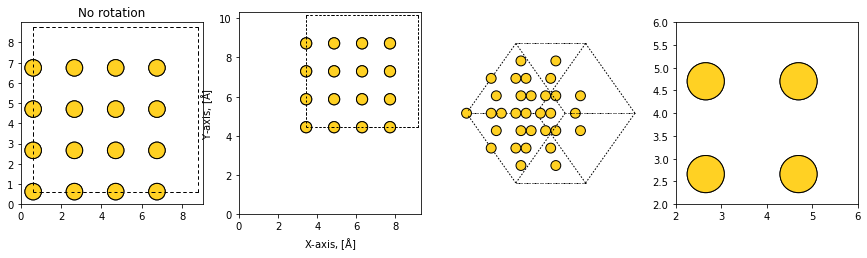

In [4]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
from ase.lattice.cubic import FaceCenteredCubic
slab = FaceCenteredCubic('Au', size=(2, 2, 2))
fig, axarr = plt.subplots(1, 4, figsize=(15, 5))
plot_atoms(slab, axarr[0], radii=0.3, rotation=('0x,0y,0z'))
plot_atoms(slab, axarr[1], scale=0.7, offset=(3, 4), radii=0.3, rotation=('0x,0y,0z'))
plot_atoms(slab, axarr[2], radii=0.3, rotation=('45x,45y,0z'))
plot_atoms(slab, axarr[3], radii=0.3, rotation=('0x,0y,0z'))
axarr[0].set_title("No rotation")
axarr[1].set_xlabel("X-axis, [$\mathrm{\AA}$]")
axarr[1].set_ylabel("Y-axis, [$\mathrm{\AA}$]")
axarr[2].set_axis_off()
axarr[3].set_xlim(2, 6)
axarr[3].set_ylim(2, 6)
fig.savefig("ase_slab_multiple.png")

In [10]:
from ase import Atoms
from ase.build import surface, bulk
from ase.calculators.vasp import Vasp
from ase.constraints import FixAtoms
from ase.optimize import QuasiNewton
from ase.lattice.surface import hcp0001
from ase.io import write,read

In [11]:
#CeO2(111) surface

#Lattice constant
a = 5.46745036711

#Coordinates of the unit-cell atoms in fractional 
#coordinates (the fractional coordinates can be 
#found in the link given in external link section)
CeO2 = Atoms([
              Atom('Ce', (0., 0., 0.)),
              Atom('Ce', (0., 0.5, 0.5)),
              Atom('Ce', (0.5, 0., 0.5)),
              Atom('Ce', (0.5, 0.5, 0.)),
              Atom('O', (0.75, 0.25, 0.25)),
              Atom('O', (0.25, 0.75, 0.75)),
              Atom('O', (0.75, 0.75, 0.75)),
              Atom('O', (0.25, 0.25, 0.25)),
              Atom('O', (0.25, 0.25, 0.75)),
              Atom('O', (0.75, 0.75, 0.25)),
              Atom('O', (0.25, 0.75, 0.25)),
              Atom('O', (0.75, 0.25, 0.75))
                                           ])

#Defining lattice size in a, b and c directions. 
#In this case, they are all equal.
cell = [(a, 0., 0.),
        (0., a, 0.),
        (0., 0., a)]

#Scales the atomic positions with the unit cell
CeO2.set_cell(cell, scale_atoms=True)
#(1,1,1) is the slab type. There are 2 unit cells along 
#z direction
slab = surface(CeO2, (1, 1, 1), 2)

#Repeating the slab 2 unit cells in x and 1 unit cell 
#in y directions
slab = slab.repeat((2,1,1))
slab.center(vacuum=10, axis=2)

In [13]:
from ase.build import fcc111, add_adsorbate
slab = fcc111('Au', size=(2,2,3))
add_adsorbate(slab, 'Pb', 1.5, 'ontop')
slab.center(vacuum=10.0, axis=2)

In [16]:
import matplotlib.image as mpimg
stem_image = mpimg.imread("C:\Users\saraswat\Desktop\stem_image.jpg")
atom_pos = [(0.0, 0.0, 0.0), (0.5, 0.5, 0.5), (0.5, 0.5, 0.0)]
srtio3 = crystal(['Sr','Ti','O'], atom_pos, spacegroup=221, cellpar=3.905, size=(3, 3, 3))
fig, ax = plt.subplots()
ax.imshow(stem_image, cmap='gray')
plot_atoms(srtio3, ax, radii=0.3, scale=6.3, offset=(47, 54), rotation=('90x,45y,56z'))
ax.set_xlim(0, stem_image.shape[0])
ax.set_ylim(0, stem_image.shape[1])
ax.set_axis_off()
fig.tight_layout()
fig.savefig("C:\Users\saraswat\Desktop\iomatplotlib3.png")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_11228/2576354366.py, line 2)

In [1]:
from espresso import iEspresso
from ase.io import read


In [2]:
from espresso import espresso

In [5]:
from ase import Atoms
from ase.io import write
from espresso import Espresso

# Define the ase-espresso keys we will use.
keys = {
    'mode': 'relax',
    'opt_algorithm': 'bfgs',
    'xc': 'RPBE',
    'outdir': '.',
    'output': {'removesave': True},
    'pw': 200,
    'dw': 2000,
    'dipole': {'status': True},
    'kpts': (1, 1, 1),
    'calcstress': True,
    'convergence': {
	'energy': 1e-5,
	'mixing': 0.35}}

# Create the atoms object
atoms = Atoms(
    'H2',
    [[0.0, 0.0, 0.0],
     [0.0, 0.0, 0.8]])
atoms.center(vacuum=4)
atoms.info = keys
write('input.traj', atoms)

# Calculate the relaxation
calc = Espresso(**keys)
atoms.set_calculator(calc)
atoms.get_potential_energy()

# Save the compressed calculator file so that we can use it for later.
calc.save_flev_output()

TypeError: __init__() got an unexpected keyword argument 'mode'

In [4]:
espresso.

In [9]:
# Import necessary packages
from ase import Atoms
from ase.io import write
from ase.lattice.surface import fcc100
from espresso import Espresso
import pickle

# Generate the representation of the atoms in ASE
slab = fcc100('Pt', size=(2,2,3), vacuum=10.0)

# Create an espresso calculator object
# (Tailor for desired settings and accuracy)
calc = Espresso(pw=400 , # Plane wave cutoff
                dw=4000, # Density wave cutoff
                kpts=(3,3,1), # (rather sparse) k-point (Brillouin) sampling
                xc='RPBE', #Exchange-correlation functional
                dipole={'status':True}, # Includes dipole correction (necessary for asymmetric slabs)
                outdir='pt100_analysis') # Espresso-generated files will be put here

# Attach the calculator object to the atoms
slab.set_calculator(calc)

# Perform a static calculation to generate wavefunctions
slab.get_potential_energy()

# Create an image of the atoms
write('slab.png',slab)

# Get the electrostatic potential
potential = calc.extract_ionic_and_hartree_potential()

# Create and populate output file for electrostatic potential

potential_file=open('potential.pickle','w')
pickle.dump(potential,potential_file)
potential_file.close()

AttributeError: module 'os' has no attribute 'getuid'

In [14]:
from espresso import iEspresso
from ase.io import read
initial = read('ethane.traj')
initial.get_potential_energy()
final = initial.copy()
final.positions[2:5] = initial.positions[[3, 4, 2]]
final.get_potential_energy()


RuntimeError: Atoms object has no calculator.

In [15]:
images = [initial]
for _ in range(7):
    image = initial.copy()
    image.set_calculator(iEspresso(pw=300, dw=4000,kpts='gamma',xc='PBE'))
    images.append(image)
images.append(final)


In [16]:
from espresso.nebespresso import NEBEspresso
from ase.optimize.fire import FIRE as QuasiNewton
neb = NEBEspresso(images)
neb.interpolate('idpp')
qn = QuasiNewton(neb, logfile='ethane_linear.log', trajectory='neb.traj')
qn.run(fmax=0.05)
from ase.neb import NEBTools
nt = NEBTools(neb.images)
fig = nt.plot_band()
fig.savefig('rotation-barrier.png')

NotImplementedError: Interactive NEB is not supported

In [1]:
from ase.build import molecule
from xespresso import Espresso

atoms = molecule('H2')
atoms.center(5)
atoms.pbc = [True, True, True]
pseudopotentials = {'H': 'H.pbe-rrkjus_psl.1.0.0.UPF'}
calc = Espresso(label = 'relax/h2',
                pseudopotentials = pseudopotentials,
                calculation = 'relax',
                ecutwfc = 20,
                kpts = (1, 1, 1),
                debug = True,
                )
atoms.calc = calc
e = atoms.get_potential_energy()
print('Energy = {0:1.3f} eV'.format(e))

=============================pw=============================
DEBUG    [set_label           ]: Directory: .
DEBUG    [set_label           ]: Prefix: relax\h2\h2
DEBUG    [read                ]: Directory . is not a espresso folder, start a new calculation:


TypeError: argument of type 'NoneType' is not iterable

In [2]:
from ase.dft.stm import STM

In [4]:
from ase.build import bulk, fcc111
from ase.visualize import view
from xespresso import Espresso
from xespresso.dos import DOS
from xespresso.tools import get_nbnd
import matplotlib.pyplot as plt


atoms = fcc111('Al', size = (1, 1, 2), vacuum = 4.0)
view(atoms)
print(atoms)
pseudopotentials = {'Al': 'Al.pbe-n-rrkjus_psl.1.0.0.UPF',}
calc = Espresso(pseudopotentials = pseudopotentials, 
                label  = 'scf/al',
                ecutwfc = 40,
                occupations = 'smearing',
                degauss = 0.01,
                kpts=(4, 4, 1))
atoms.calc = calc
e = atoms.get_potential_energy()
calc.read_results()
e = calc.results['energy']
fermi = calc.get_fermi_level()
print('Energy: {0:1.3f}'.format(e))

Atoms(symbols='Al2', pbc=[True, True, False], cell=[[2.8637824638055176, 0.0, 0.0], [1.4318912319027588, 2.4801083645679673, 0.0], [0.0, 0.0, 10.338268590217984]], tags=...)
=============================pw=============================
DEBUG    [set_label           ]: Directory: .
DEBUG    [set_label           ]: Prefix: scf\al\al
DEBUG    [read                ]: Directory . is not a espresso folder, start a new calculation:


TypeError: argument of type 'NoneType' is not iterable

In [5]:
from ase.calculators.espresso import Espresso

In [6]:
from qeutil import QuantumEspresso

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Launching:', end=" ")? (__init__.py, line 496)